# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
%matplotlib inline

In [2]:
pwd

'/Users/tupran/Documents/Data/GitHub/GuidedCapstone/DataWrangling'

**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [3]:
df = pd.read_csv('/Users/tupran/Documents/Data/GitHub/GuidedCapstone/data/step2_output.csv', index_col=0)
df.head()

Region    state  summit_elev  vertical_drop  base_elev  \
Name                                                                           
Alyeska Resort        Alaska   Alaska         3939           2500        250   
Eaglecrest Ski Area   Alaska   Alaska         2600           1540       1200   
Hilltop Ski Area      Alaska   Alaska         2090            294       1796   
Arizona Snowbowl     Arizona  Arizona        11500           2300       9200   
Sunrise Park Resort  Arizona  Arizona        11100           1800       9200   

                     trams  fastEight  fastSixes  fastQuads  quad  ...  \
Name                                                               ...   
Alyeska Resort           1        0.0          0          2     2  ...   
Eaglecrest Ski Area      0        0.0          0          0     0  ...   
Hilltop Ski Area         0        0.0          0          0     0  ...   
Arizona Snowbowl         0        0.0          1          0     2  ...   
Sunrise Park Resort      0        0.0          0          1     2  ...   

                     LongestRun_mi  SkiableTerrain_ac  Snow Making_ac  \
Name                                                                    
Alyeska Resort                 1.0             1610.0           113.0   
Eaglecrest Ski Area            2.0              640.0            60.0   
Hilltop Ski Area               1.0               30.0            30.0   
Arizona Snowbowl               2.0              777.0           104.0   
Sunrise Park Resort            1.2              800.0            80.0   

                     daysOpenLastYear  yearsOpen  averageSnowfall  \
Name                                                                
Alyeska Resort                  150.0       60.0            669.0   
Eaglecrest Ski Area              45.0       44.0            350.0   
Hilltop Ski Area                150.0       36.0             69.0   
Arizona Snowbowl                122.0       81.0            260.0   
Sunrise Park Resort             115.0       49.0            250.0   

                     AdultWeekday  AdultWeekend  projectedDaysOpen  \
Name                                                                 
Alyeska Resort               65.0          85.0              150.0   
Eaglecrest Ski Area          47.0          53.0               90.0   
Hilltop Ski Area             30.0          34.0              152.0   
Arizona Snowbowl             89.0          89.0              122.0   
Sunrise Park Resort          74.0          78.0              104.0   

                     NightSkiing_ac  
Name                                 
Alyeska Resort                550.0  
Eaglecrest Ski Area             0.0  
Hilltop Ski Area               30.0  
Arizona Snowbowl                0.0  
Sunrise Park Resort            80.0  

[5 rows x 26 columns]

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [4]:
df.describe().T

count         mean          std    min      25%  \
summit_elev        330.0  4591.818182  3735.535934  315.0  1403.75   
vertical_drop      330.0  1215.427273   947.864557   60.0   461.25   
base_elev          330.0  3374.000000  3117.121621   70.0   869.00   
trams              330.0     0.172727     0.559946    0.0     0.00   
fastEight          330.0     0.003030     0.055048    0.0     0.00   
fastSixes          330.0     0.184848     0.651685    0.0     0.00   
fastQuads          330.0     1.018182     2.198294    0.0     0.00   
quad               330.0     0.933333     1.312245    0.0     0.00   
triple             330.0     1.500000     1.619130    0.0     0.00   
double             330.0     1.833333     1.815028    0.0     1.00   
surface            330.0     2.621212     2.059636    0.0     1.00   
total_chairs       330.0     8.266667     5.798683    0.0     5.00   
Runs               330.0    47.630303    46.383327    0.0    18.00   
TerrainParks       330.0     2.384848     2.109556    0.0     1.00   
LongestRun_mi      330.0     1.411515     1.160673    0.0     0.50   
SkiableTerrain_ac  330.0   733.075758  1809.235267    0.0    80.00   
Snow Making_ac     330.0   150.496970   249.854380    0.0    30.00   
daysOpenLastYear   330.0    97.315152    52.680468    0.0    75.25   
yearsOpen          330.0    63.463636   109.319671    0.0    50.00   
averageSnowfall    330.0   177.454545   138.568976    0.0    60.00   
AdultWeekday       330.0    57.916957    23.898798   15.0    43.00   
AdultWeekend       330.0    64.166810    22.571324   17.0    49.00   
projectedDaysOpen  330.0   102.954545    50.910444    0.0    90.00   
NightSkiing_ac     330.0    56.890909    93.464882    0.0     0.00   

                           50%      75%      max  
summit_elev        3127.500000  7806.00  13487.0  
vertical_drop       964.500000  1800.00   4425.0  
base_elev          1561.500000  6325.25  10800.0  
trams                 0.000000     0.00      4.0  
fastEight             0.000000     0.00      1.0  
fastSixes             0.000000     0.00      6.0  
fastQuads             0.000000     1.00     15.0  
quad                  0.000000     1.00      8.0  
triple                1.000000     2.00      8.0  
double                1.000000     3.00     14.0  
surface               2.000000     3.00     15.0  
total_chairs          7.000000    10.00     41.0  
Runs                 33.000000    60.00    341.0  
TerrainParks          2.000000     3.00     14.0  
LongestRun_mi         1.000000     2.00      6.0  
SkiableTerrain_ac   200.000000   680.00  26819.0  
Snow Making_ac       86.000000   192.00   3379.0  
daysOpenLastYear    105.500000   130.00    305.0  
yearsOpen            58.000000    68.75   2019.0  
averageSnowfall     140.000000   278.75    669.0  
AdultWeekday         57.916957    67.00    179.0  
AdultWeekend         64.166810    72.00    179.0  
projectedDaysOpen   112.500000   136.00    305.0  
NightSkiing_ac       27.000000    83.75    650.0

**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119bc8dc0>,
      dtype=object)

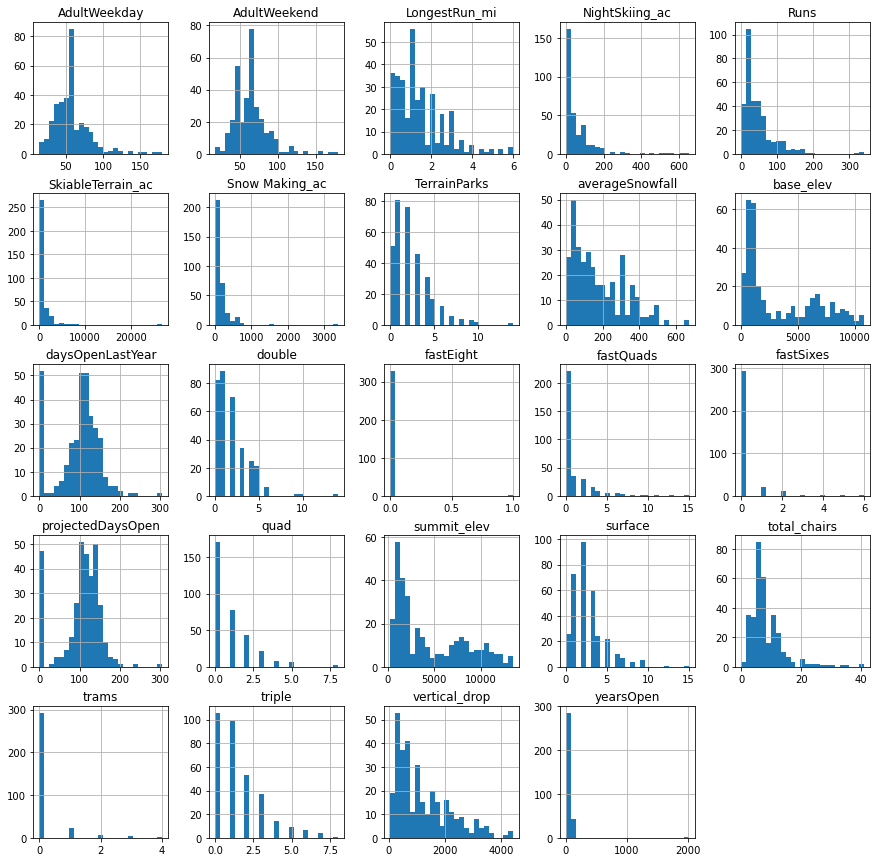

In [5]:
df.hist(bins=25,figsize=(15,15))

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

Trams, fast eight person chairs, fast six person chairs are run continously throughout the years the park is open.
The cost of adult weekday chairlift ticket is almost same as weekend.

Highly correlated features are (AdultWeekday, AdultWeekend), (fastEight,fastQuads, fastSixes, trams, yearsOpen)

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

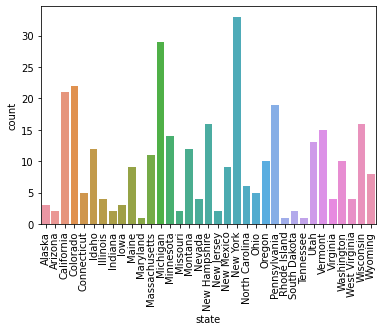

In [6]:
#select categorical variables only
df_cat = df.select_dtypes(include = 'object').copy()

#get counts of each variable value
df_cat.state.value_counts()

#Rotate x-axis lables by 90 deg
plt.xticks(rotation=90)

#count plot for one variable
sns.countplot(data = df_cat, x = 'state')

**<font color='teal'>Region Levels Plot</font>**

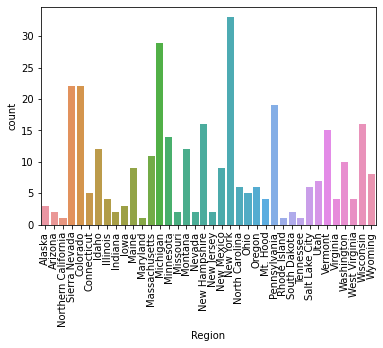

In [7]:
#get counts of each variable value
df_cat.Region.value_counts()

#Rotate x-axis lables by 90 deg
plt.xticks(rotation=90)

#count plot for one variable
sns.countplot(data = df_cat, x = 'Region')

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [8]:
df.drop('Region', axis= 1,inplace=True)

## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

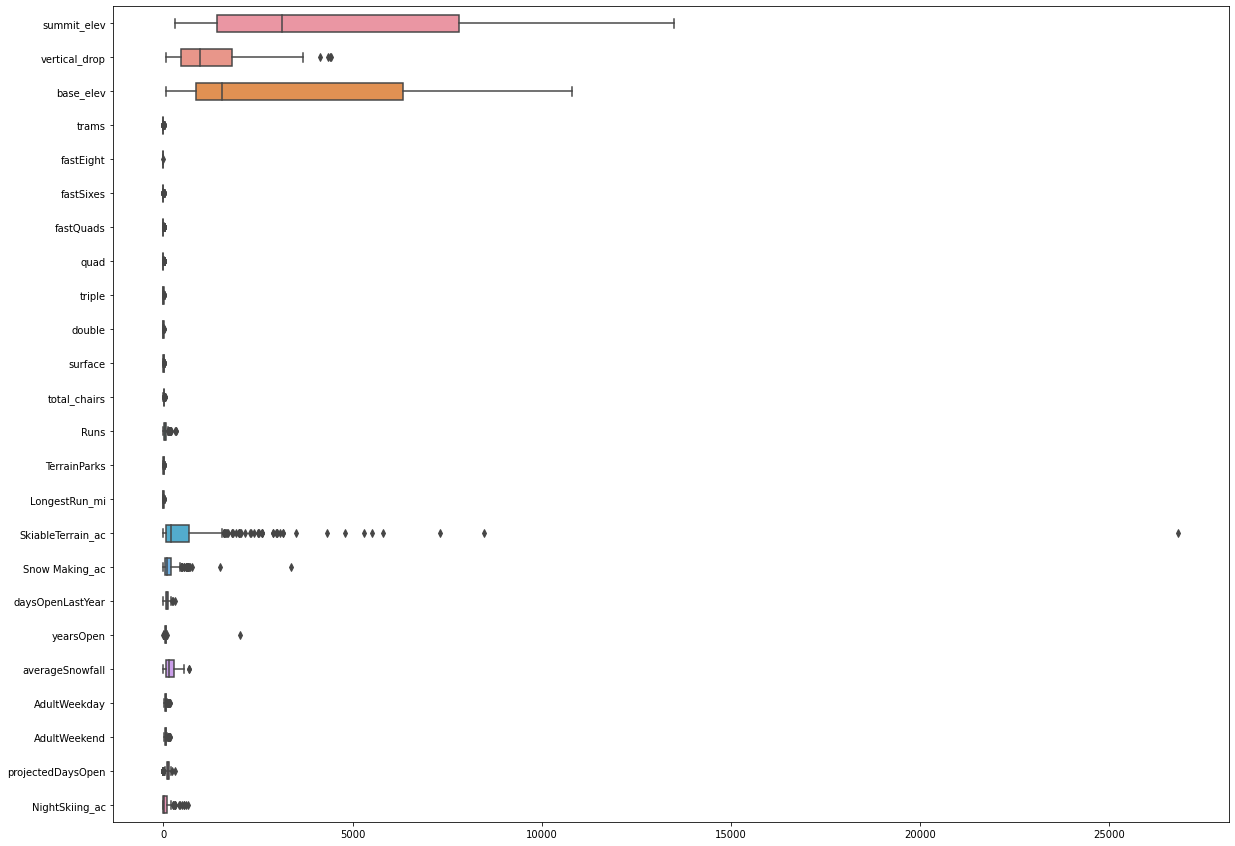

In [9]:
f, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(data=df ,orient='h', width=0.5)

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

SkiableTerrain_ac    49
projectedDaysOpen    49
fastQuads            44
quad                 38
trams                37
fastSixes            36
Snow Making_ac       24
yearsOpen            20
total_chairs         20
Runs                 19
surface              18
TerrainParks         16
AdultWeekday         15
AdultWeekend         14
NightSkiing_ac       13
triple               12
LongestRun_mi        10
vertical_drop         4
double                3
daysOpenLastYear      3
averageSnowfall       2
fastEight             1
base_elev             0
state                 0
summit_elev           0
dtype: int64

In [11]:
dfo =df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
dfo.describe().T

count         mean          std    min     25%  \
summit_elev        173.0  5388.416185  3988.320758  440.0  1600.0   
vertical_drop      173.0  1545.479769  1090.394896   60.0   510.0   
base_elev          173.0  3850.595376  3237.423363  126.0   998.0   
trams              173.0     0.329480     0.740127    0.0     0.0   
fastEight          173.0     0.005780     0.076029    0.0     0.0   
fastSixes          173.0     0.352601     0.867673    0.0     0.0   
fastQuads          173.0     1.722543     2.806432    0.0     0.0   
quad               173.0     1.306358     1.597169    0.0     0.0   
triple             173.0     1.757225     1.854917    0.0     0.0   
double             173.0     1.901734     2.059196    0.0     0.0   
surface            173.0     2.982659     2.450615    0.0     1.0   
total_chairs       173.0    10.358382     6.935660    1.0     6.0   
Runs               173.0    63.774566    57.327507    0.0    22.0   
TerrainParks       173.0     2.907514     2.476072    0.0     1.0   
LongestRun_mi      173.0     1.737572     1.368682    0.0     0.7   
SkiableTerrain_ac  173.0  1188.953757  2397.894190    0.0   110.0   
Snow Making_ac     173.0   210.173410   327.284092    0.0    28.0   
daysOpenLastYear   173.0   101.988439    61.665922    0.0    80.0   
yearsOpen          173.0    67.982659   150.397244    0.0    50.0   
averageSnowfall    173.0   207.809249   153.764406    0.0    80.0   
AdultWeekday       173.0    64.715320    27.680837   15.0    49.0   
AdultWeekend       173.0    70.091551    26.221448   17.0    58.0   
projectedDaysOpen  173.0    97.410405    65.059448    0.0     0.0   
NightSkiing_ac     173.0    68.161850   119.506725    0.0     0.0   

                           50%     75%      max  
summit_elev        4083.000000  9065.0  13487.0  
vertical_drop      1500.000000  2340.0   4425.0  
base_elev          2035.000000  6640.0  10800.0  
trams                 0.000000     0.0      4.0  
fastEight             0.000000     0.0      1.0  
fastSixes             0.000000     0.0      6.0  
fastQuads             0.000000     3.0     15.0  
quad                  1.000000     2.0      8.0  
triple                1.000000     3.0      8.0  
double                1.000000     3.0     14.0  
surface               2.000000     4.0     15.0  
total_chairs          9.000000    12.0     41.0  
Runs                 50.000000    92.0    341.0  
TerrainParks          2.000000     4.0     14.0  
LongestRun_mi         1.400000     2.5      6.0  
SkiableTerrain_ac   415.000000  1610.0  26819.0  
Snow Making_ac      112.000000   270.0   3379.0  
daysOpenLastYear    116.000000   143.0    305.0  
yearsOpen            58.000000    71.0   2019.0  
averageSnowfall     180.000000   311.0    669.0  
AdultWeekday         57.916957    79.0    179.0  
AdultWeekend         64.166810    81.0    179.0  
projectedDaysOpen   120.000000   143.0    305.0  
NightSkiing_ac        9.000000   100.0    650.0

In [12]:
#filtering outliers
df_remove = df[(np.abs(stats.zscore(df.iloc[:,2:]))<3).all(axis=1)]
df.index.difference(df_remove.index)

Index(['Afton Alps', 'Alyeska Resort', 'Aspen / Snowmass', 'Bear Mountain',
       'Beaver Creek', 'Big Powderhorn Mountain', 'Big Sky Resort',
       'Bittersweet Ski Area', 'Blue Mountain Resort', 'Brandywine',
       'Breckenridge', 'Copper Mountain Resort', 'Deer Valley Resort',
       'Heavenly Mountain Resort', 'Holiday Valley', 'Howelsen Hill',
       'Hunt Hollow Ski Club', 'Jackson Hole', 'Keystone', 'Killington Resort',
       'Kissing Bridge', 'Liberty', 'Mammoth Mountain Ski Area',
       'Mission Ridge', 'Mount Kato Ski Area', 'Mount Snow', 'Mt. Bachelor',
       'Mt. Baker', 'Mt. Rose - Ski Tahoe', 'Northstar California',
       'Okemo Mountain Resort', 'Park City', 'Peek'n Peak',
       'Pine Knob Ski Resort', 'Powder Mountain', 'Purgatory',
       'Schuss Mountain at Shanty Creek', 'Silverton Mountain', 'Snowbasin',
       'Stevens Pass Resort', 'Stowe Mountain Resort', 'Stratton Mountain',
       'Sugarbush', 'Sun Valley', 'Sunday River', 'Taos Ski Valley',
       'Tel

In [14]:
desc_df = df.describe()

desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] -  (desc_df.loc['std'] * 3)

desc_df

summit_elev  vertical_drop     base_elev       trams   fastEight  \
count     330.000000     330.000000    330.000000  330.000000  330.000000   
mean     4591.818182    1215.427273   3374.000000    0.172727    0.003030   
std      3735.535934     947.864557   3117.121621    0.559946    0.055048   
min       315.000000      60.000000     70.000000    0.000000    0.000000   
25%      1403.750000     461.250000    869.000000    0.000000    0.000000   
50%      3127.500000     964.500000   1561.500000    0.000000    0.000000   
75%      7806.000000    1800.000000   6325.250000    0.000000    0.000000   
max     13487.000000    4425.000000  10800.000000    4.000000    1.000000   
+3_std  15798.425984    4059.020943  12725.364862    1.852566    0.168175   
-3_std  -6614.789620   -1628.166398  -5977.364862   -1.507111   -0.162114   

         fastSixes   fastQuads        quad      triple      double  ...  \
count   330.000000  330.000000  330.000000  330.000000  330.000000  ...   
mean      0.184848    1.018182    0.933333    1.500000    1.833333  ...   
std       0.651685    2.198294    1.312245    1.619130    1.815028  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%       0.000000    0.000000    0.000000    0.000000    1.000000  ...   
50%       0.000000    0.000000    0.000000    1.000000    1.000000  ...   
75%       0.000000    1.000000    1.000000    2.000000    3.000000  ...   
max       6.000000   15.000000    8.000000    8.000000   14.000000  ...   
+3_std    2.139904    7.613063    4.870067    6.357389    7.278417  ...   
-3_std   -1.770207   -5.576699   -3.003400   -3.357389   -3.611750  ...   

        LongestRun_mi  SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  \
count      330.000000         330.000000       330.00000        330.000000   
mean         1.411515         733.075758       150.49697         97.315152   
std          1.160673        1809.235267       249.85438         52.680468   
min          0.000000           0.000000         0.00000          0.000000   
25%          0.500000          80.000000        30.00000         75.250000   
50%          1.000000         200.000000        86.00000        105.500000   
75%          2.000000         680.000000       192.00000        130.000000   
max          6.000000       26819.000000      3379.00000        305.000000   
+3_std       4.893534        6160.781560       900.06011        255.356555   
-3_std      -2.070504       -4694.630044      -599.06617        -60.726252   

          yearsOpen  averageSnowfall  AdultWeekday  AdultWeekend  \
count    330.000000       330.000000    330.000000    330.000000   
mean      63.463636       177.454545     57.916957     64.166810   
std      109.319671       138.568976     23.898798     22.571324   
min        0.000000         0.000000     15.000000     17.000000   
25%       50.000000        60.000000     43.000000     49.000000   
50%       58.000000       140.000000     57.916957     64.166810   
75%       68.750000       278.750000     67.000000     72.000000   
max     2019.000000       669.000000    179.000000    179.000000   
+3_std   391.422649       593.161474    129.613352    131.880781   
-3_std  -264.495377      -238.252383    -13.779439     -3.547161   

        projectedDaysOpen  NightSkiing_ac  
count          330.000000      330.000000  
mean           102.954545       56.890909  
std             50.910444       93.464882  
min              0.000000        0.000000  
25%             90.000000        0.000000  
50%            112.500000       27.000000  
75%            136.000000       83.750000  
max            305.000000      650.000000  
+3_std         255.685877      337.285554  
-3_std         -49.776787     -223.503736  

[10 rows x 24 columns]

In [15]:
#df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_out.shape
df_remove.describe().T

count         mean          std    min      25%     50%  \
summit_elev        278.0  4174.169065  3482.984459  315.0  1335.75  2365.0   
vertical_drop      278.0  1032.230216   750.168648   60.0   434.00   785.0   
base_elev          278.0  3133.982014  3018.789449   70.0   838.75  1350.0   
trams              278.0     0.050360     0.219080    0.0     0.00     0.0   
fastEight          278.0     0.000000     0.000000    0.0     0.00     0.0   
fastSixes          278.0     0.075540     0.314589    0.0     0.00     0.0   
fastQuads          278.0     0.521583     1.083800    0.0     0.00     0.0   
quad               278.0     0.741007     0.978750    0.0     0.00     0.0   
triple             278.0     1.298561     1.373051    0.0     0.00     1.0   
double             278.0     1.744604     1.551600    0.0     1.00     1.0   
surface            278.0     2.348921     1.595520    0.0     1.00     2.0   
total_chairs       278.0     6.780576     3.179137    0.0     5.00     6.0   
Runs               278.0    37.964029    28.800048    0.0    17.00    28.0   
TerrainParks       278.0     2.000000     1.654226    0.0     1.00     2.0   
LongestRun_mi      278.0     1.185612     0.870210    0.0     0.50     1.0   
SkiableTerrain_ac  278.0   422.035971   612.644058    0.0    69.25   168.0   
Snow Making_ac     278.0   102.935252   106.861678    0.0    30.00    70.0   
daysOpenLastYear   278.0    90.532374    50.455728    0.0    68.25   100.5   
yearsOpen          278.0    57.143885    17.469132    0.0    50.00    58.0   
averageSnowfall    278.0   159.273381   127.916704    0.0    50.25   120.0   
AdultWeekday       278.0    54.602243    19.277644   15.0    41.25    55.0   
AdultWeekend       278.0    60.952762    18.249395   17.0    47.00    62.0   
projectedDaysOpen  278.0    99.467626    48.837135    0.0    90.00   109.5   
NightSkiing_ac     278.0    46.500000    56.884756    0.0     0.00    30.0   

                       75%      max  
summit_elev        7275.00  13050.0  
vertical_drop      1507.50   3668.0  
base_elev          5800.00  10800.0  
trams                 0.00      1.0  
fastEight             0.00      0.0  
fastSixes             0.00      2.0  
fastQuads             1.00      6.0  
quad                  1.00      4.0  
triple                2.00      6.0  
double                2.75      6.0  
surface               3.00      8.0  
total_chairs          8.75     18.0  
Runs                 51.75    170.0  
TerrainParks          3.00      8.0  
LongestRun_mi         1.60      4.5  
SkiableTerrain_ac   447.25   2965.0  
Snow Making_ac      150.00    680.0  
daysOpenLastYear    122.00    230.0  
yearsOpen            69.00     95.0  
averageSnowfall     250.00    545.0  
AdultWeekday         65.00    125.0  
AdultWeekend         70.00    125.0  
projectedDaysOpen   130.00    233.0  
NightSkiing_ac       80.00    317.0

There are many possible response variables you could have identified during Step 1 of the guided capstone. However, for the rest of this guided capstone project, you will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, you need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, you'll want to predict the number of days the mountain is open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

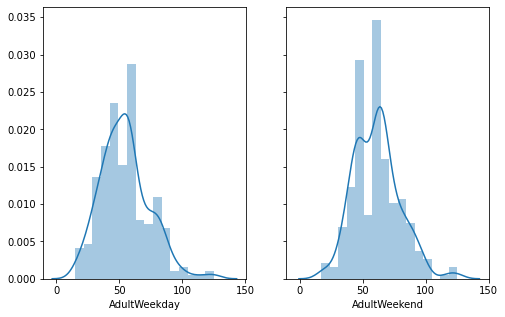

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharex=True,sharey=True)

sns.distplot(df_remove['AdultWeekday'], ax=axes[0])
sns.distplot(df_remove['AdultWeekend'], ax=axes[1])

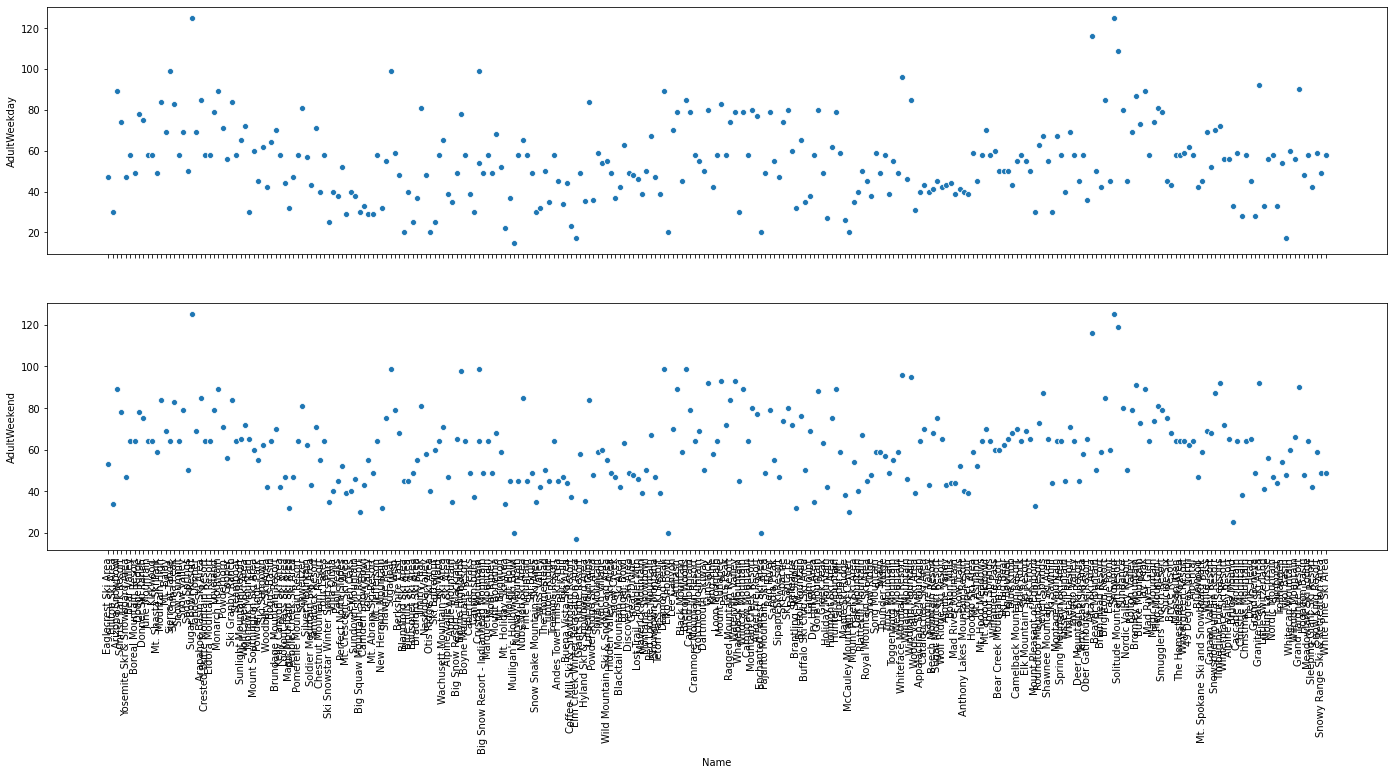

In [17]:
fig, axes = plt.subplots(2,1, figsize=(24, 10), sharex=True)

_ = sns.scatterplot(x=df_remove.index, y= df_remove['AdultWeekday'],ax=axes[0])
_ = sns.scatterplot(x=df_remove.index, y=df_remove['AdultWeekend'],ax=axes[1])
_ = plt.xticks(rotation=90)

There is a strong positive relationship between Adult weekday chair lift ticket and Adult weekend chair lift ticket. It is observed that there is not much difference in pricing between weekday and weekend ticket pricing for chair lifts

In [ ]:
'''# function to compute Empirical Cumulative Distribution Function

def ecdf(data):
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y'''

In [ ]:
'''sns.set()
x_day, y_day = ecdf(df_out['AdultWeekday'])
x_end, y_end = ecdf(df_out['AdultWeekend'])
_ = plt.plot(x_day, y_day, color='r')
_ = plt.plot(x_end, y_end, color='g')
_ = plt.xlabel('Ticket Price in $')
_ = plt.ylabel("CDF")
arr1 = plt.arrow(0,0, 3,1, head_width=0.2, color='r', length_includes_head=True)
arr2 = plt.arrow(0,0, 1,3, head_width=0.2, color='g', length_includes_head=True)
_ = plt.legend([arr1, arr2], ['AdultWeekday','AdultWeekend'])
plt.show()'''

<font color='teal'>**Review the `daysOpenLastYear`,`projectedDaysOpen` response variable distributions**</font>

In [ ]:
'''n_bins2 = int(np.sqrt(len(df_out['daysOpenLastYear'])))
df_out['daysOpenLastYear'].hist(bins=n_bins2, color='r')
n_bins3 = int(np.sqrt(len(df_out['projectedDaysOpen'])))
df_out['projectedDaysOpen'].hist(bins=n_bins3, color='g')
arr1 = plt.arrow(0,0, 3,1, head_width=0.2, color='r', length_includes_head=True)
arr2 = plt.arrow(0,0, 1,3, head_width=0.2, color='g', length_includes_head=True)
_ = plt.legend([arr1, arr2], ['daysOpenLastYear','projectedDaysOpen'])
plt.show()'''

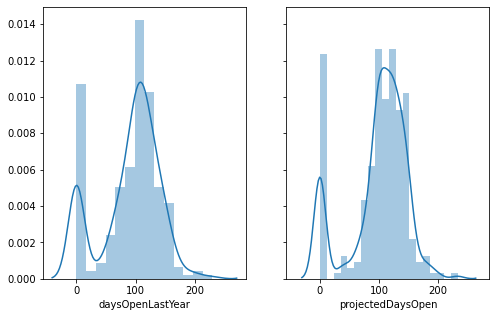

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharex=True,sharey=True)

sns.distplot(df_remove['daysOpenLastYear'], ax=axes[0])
sns.distplot(df_remove['projectedDaysOpen'], ax=axes[1])

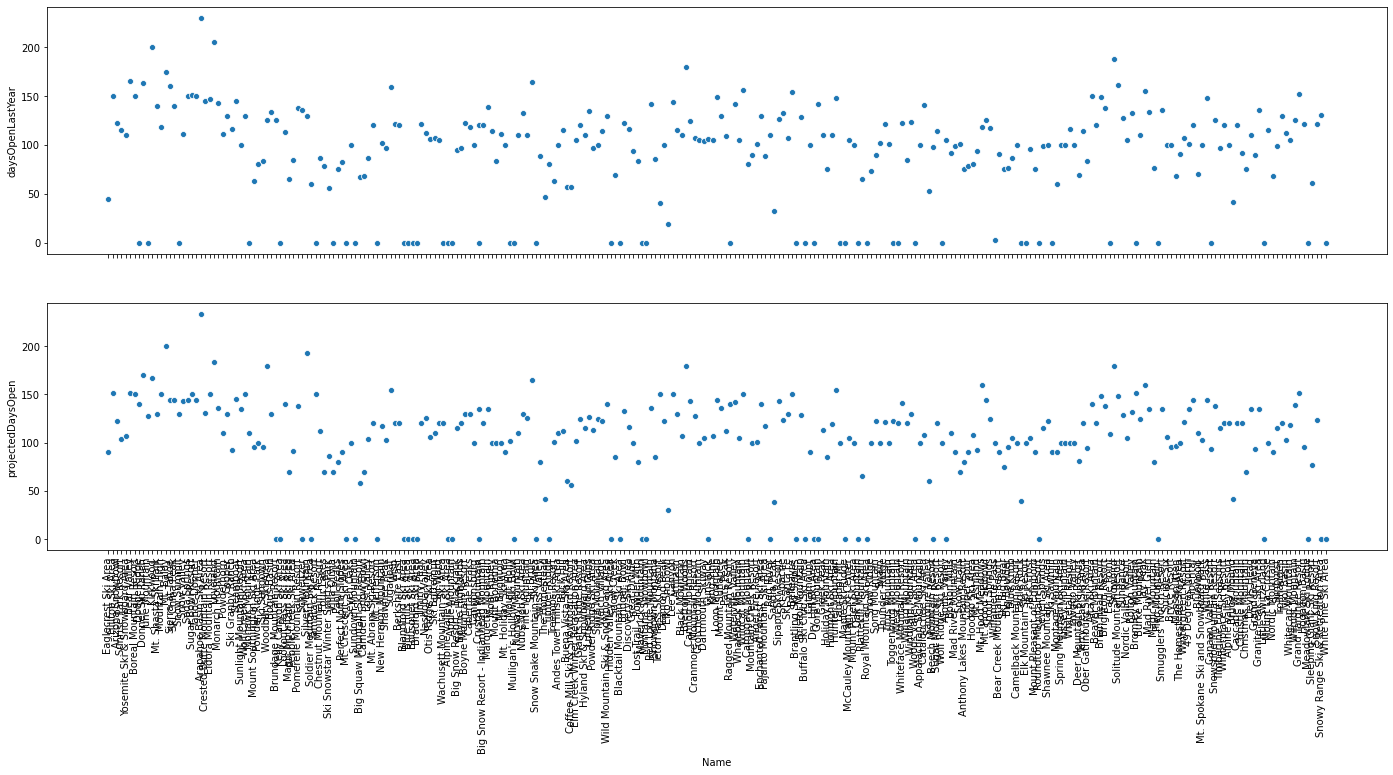

In [19]:
fig, axes = plt.subplots(2,1, figsize=(24, 10), sharex=True)

_ = sns.scatterplot(x=df_remove.index, y= df_remove['daysOpenLastYear'],ax=axes[0])
_ = sns.scatterplot(x=df_remove.index, y=df_remove['projectedDaysOpen'],ax=axes[1])
_ = plt.xticks(rotation=90)

In [ ]:
'''sns.set()
x_day, y_day = ecdf(df_out['daysOpenLastYear'])
x_end, y_end = ecdf(df_out['projectedDaysOpen'])
_ = plt.plot(x_day, y_day, color='r')
_ = plt.plot(x_end, y_end, color='g')
_ = plt.xlabel('Days')
_ = plt.ylabel("Projected Vs Days Open Last Year")
arr1 = plt.arrow(0,0, 3,1, head_width=0.2, color='r', length_includes_head=True)
arr2 = plt.arrow(0,0, 1,3, head_width=0.2, color='g', length_includes_head=True)
_ = plt.legend([arr1, arr2], ['daysOpenLastYear','projectedDaysOpen'])
plt.show()'''

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

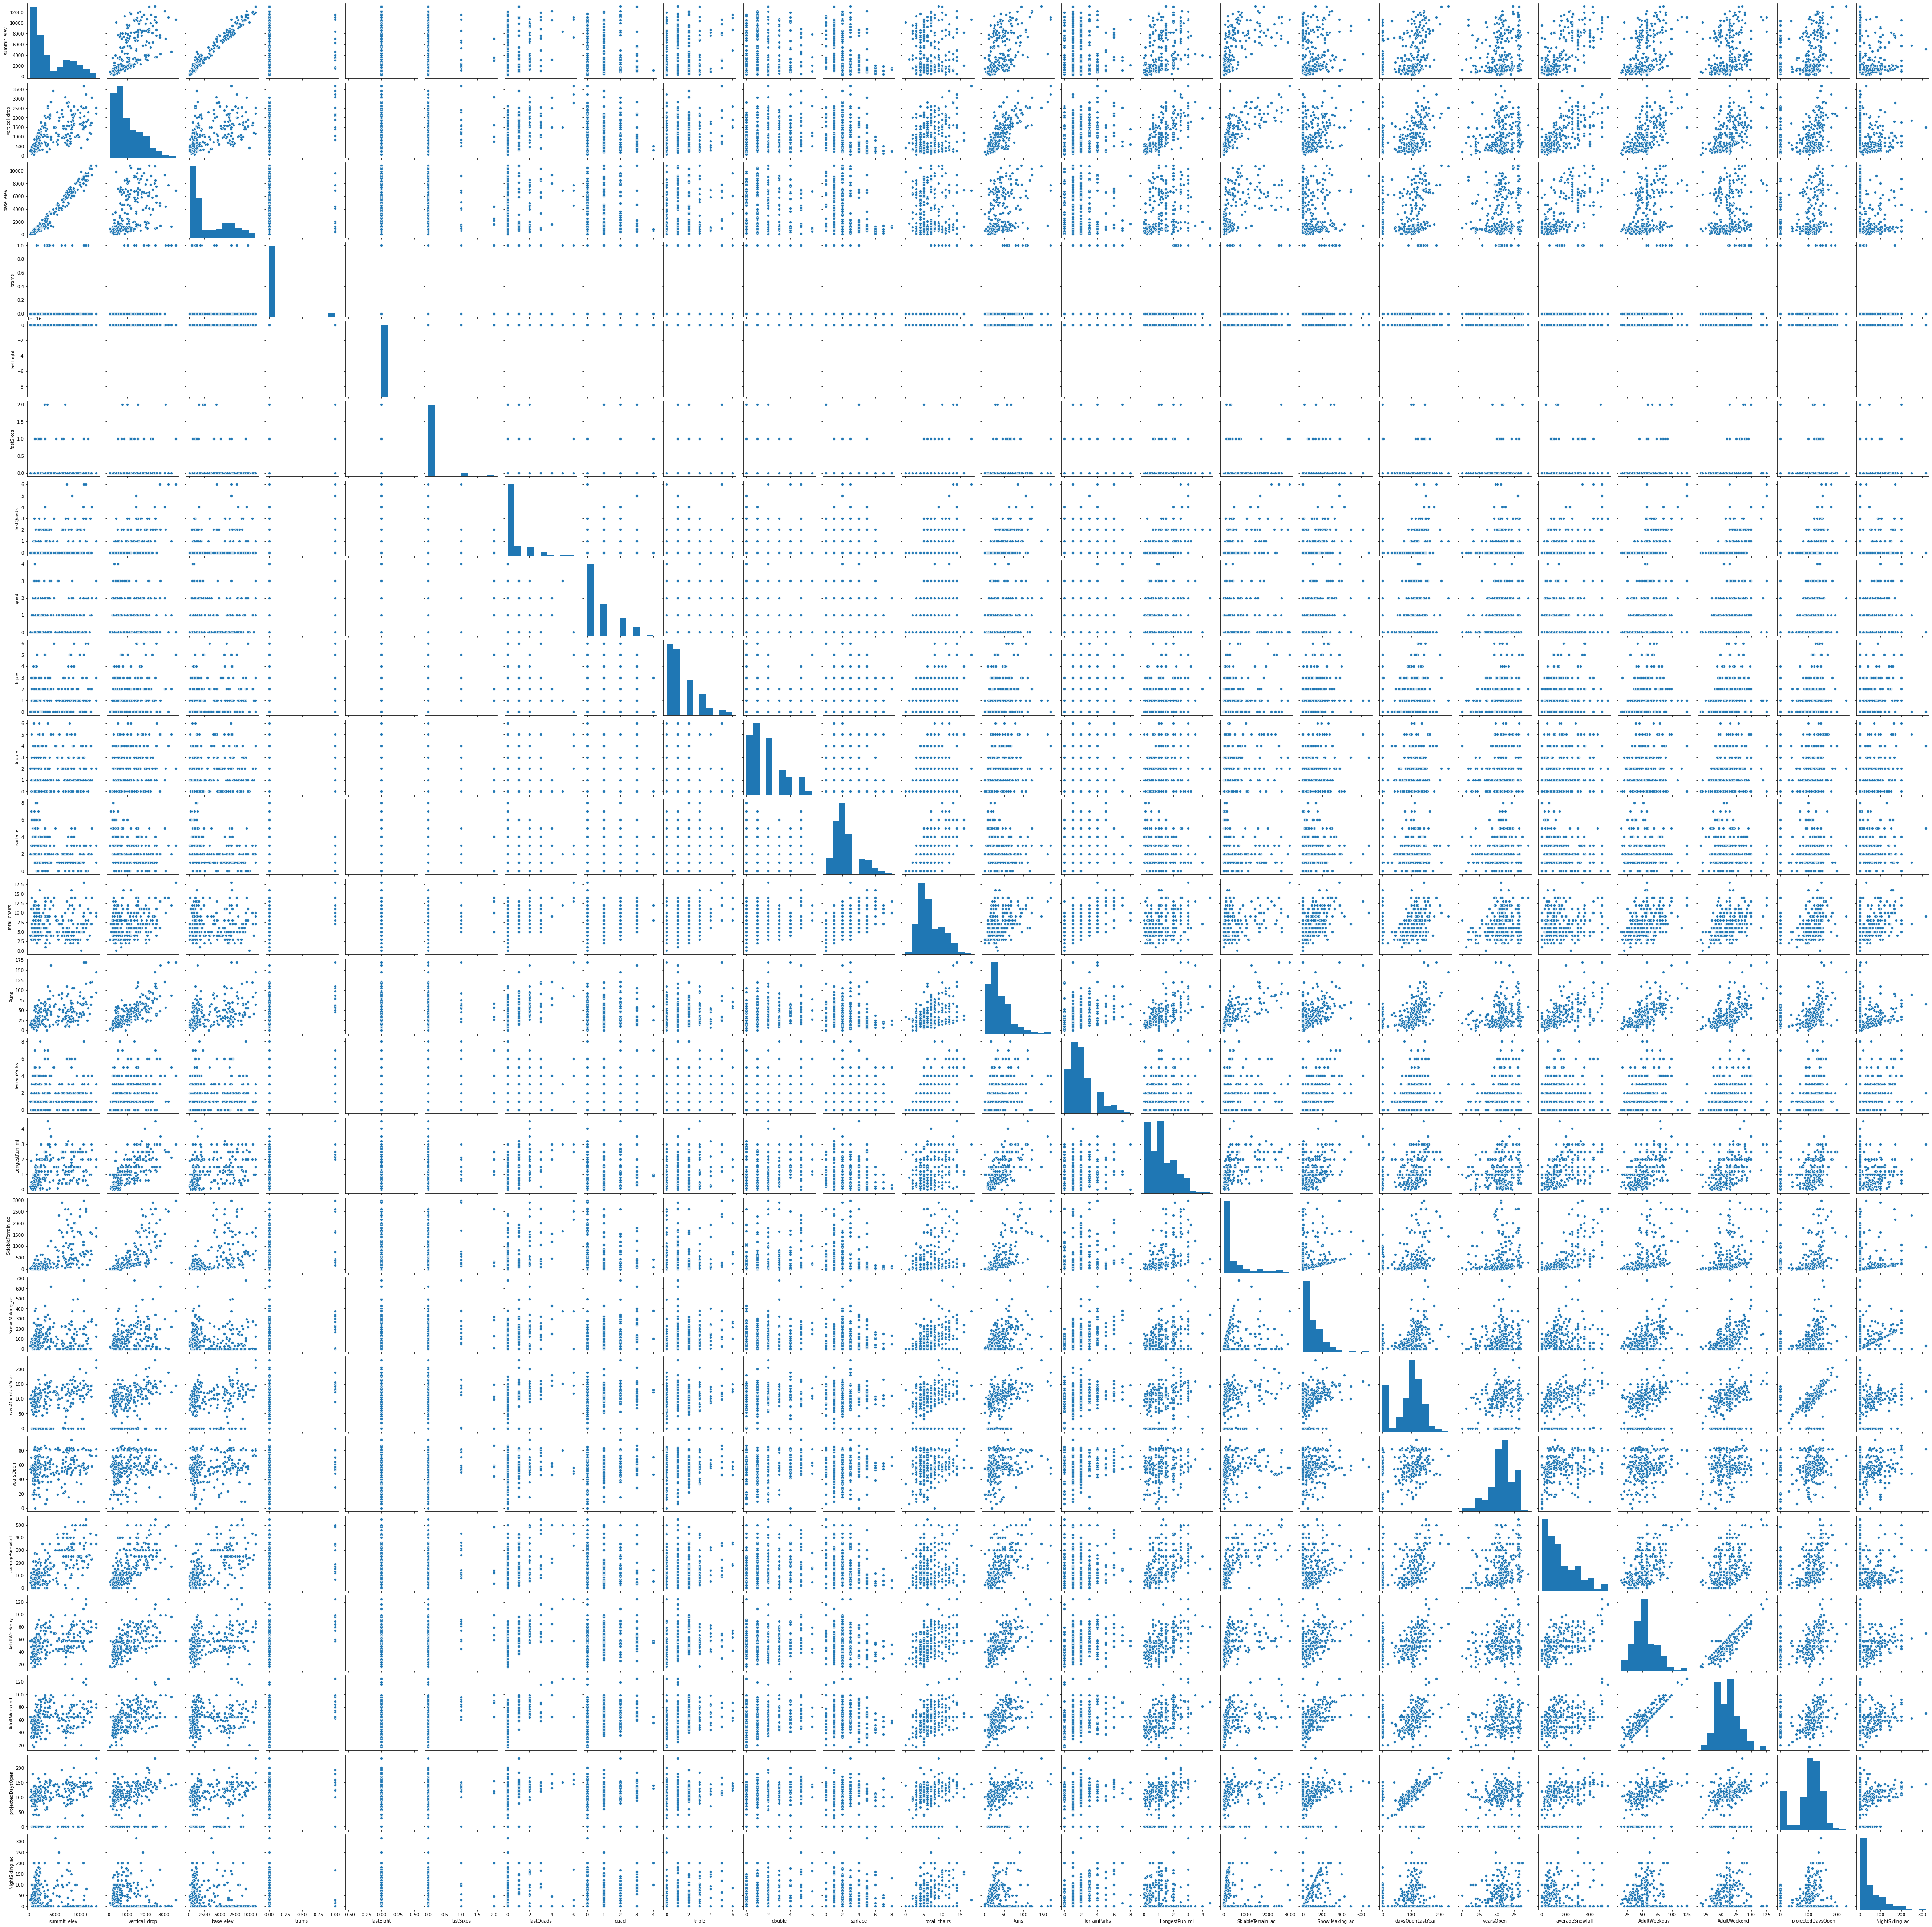

In [20]:
g = sns.pairplot(df_remove)

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

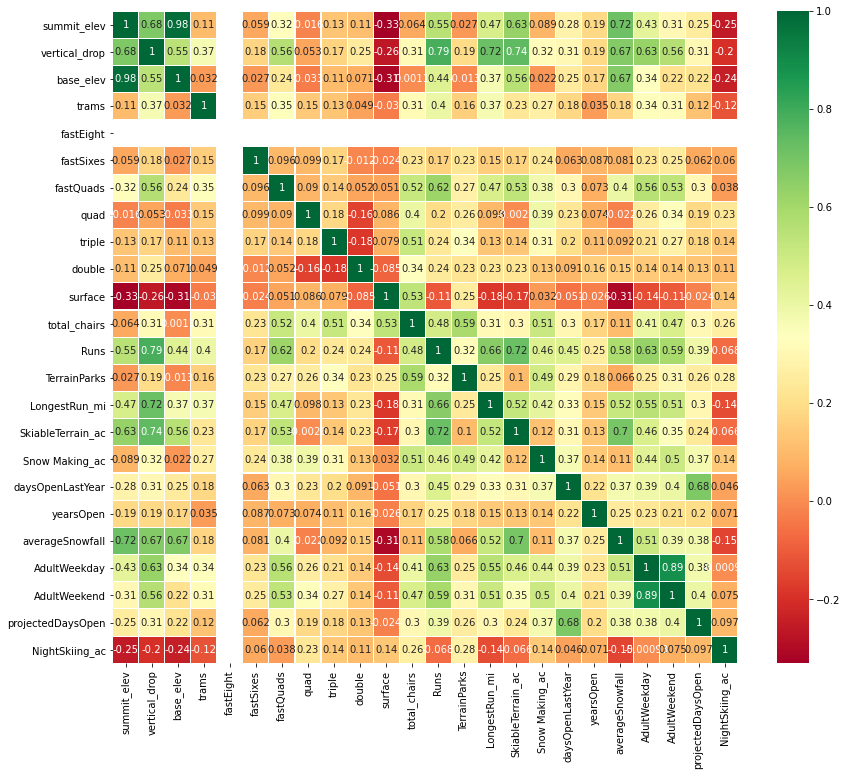

In [21]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
plt.yticks(rotation=0)
sns.heatmap(df_remove.corr(),linewidths=.1,cmap="RdYlGn", annot=True)

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [19]:
#fastEight are filled with NaN after outlier replacement
df_remove.drop(columns=['fastEight','trams'],inplace=True,axis=1)

/Users/tupran/opt/miniconda3/envs/minimal_ds/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
#correlation matrix of dataset
corr = df_remove.corr()

#display correlation matrix
display(corr)

summit_elev  vertical_drop  base_elev  fastSixes  \
summit_elev           1.000000       0.682928   0.983786   0.058698   
vertical_drop         0.682928       1.000000   0.545680   0.178753   
base_elev             0.983786       0.545680   1.000000   0.027379   
fastSixes             0.058698       0.178753   0.027379   1.000000   
fastQuads             0.324961       0.560253   0.239903   0.095790   
quad                 -0.015772       0.053410  -0.032840   0.098944   
triple                0.129334       0.169549   0.110003   0.173258   
double                0.112190       0.247382   0.071322  -0.012105   
surface              -0.330558      -0.261791  -0.314433  -0.023932   
total_chairs          0.063712       0.313175   0.001123   0.229603   
Runs                  0.550686       0.786379   0.444257   0.168052   
TerrainParks          0.026505       0.189412  -0.013033   0.228926   
LongestRun_mi         0.471417       0.722481   0.370217   0.154319   
SkiableTerrain_ac     0.634810       0.740975   0.555443   0.172651   
Snow Making_ac        0.088803       0.323973   0.022178   0.239621   
daysOpenLastYear      0.283666       0.308398   0.251304   0.062732   
yearsOpen             0.187320       0.188282   0.174062   0.086698   
averageSnowfall       0.718116       0.672313   0.668270   0.081481   
AdultWeekday          0.427251       0.627908   0.339016   0.228601   
AdultWeekend          0.305074       0.560779   0.215072   0.249009   
projectedDaysOpen     0.252726       0.307947   0.216196   0.061841   
NightSkiing_ac       -0.253953      -0.199255  -0.243461   0.060218   

                   fastQuads      quad    triple    double   surface  \
summit_elev         0.324961 -0.015772  0.129334  0.112190 -0.330558   
vertical_drop       0.560253  0.053410  0.169549  0.247382 -0.261791   
base_elev           0.239903 -0.032840  0.110003  0.071322 -0.314433   
fastSixes           0.095790  0.098944  0.173258 -0.012105 -0.023932   
fastQuads           1.000000  0.090371  0.144851  0.051593  0.050953   
quad                0.090371  1.000000  0.181319 -0.155443  0.085819   
triple              0.144851  0.181319  1.000000 -0.180981  0.079164   
double              0.051593 -0.155443 -0.180981  1.000000 -0.084910   
surface             0.050953  0.085819  0.079164 -0.084910  1.000000   
total_chairs        0.515306  0.403989  0.514592  0.339162  0.533992   
Runs                0.618451  0.196772  0.239827  0.243289 -0.108537   
TerrainParks        0.273852  0.258650  0.335368  0.225043  0.251676   
LongestRun_mi       0.468468  0.097760  0.132622  0.233091 -0.183840   
SkiableTerrain_ac   0.532579 -0.002591  0.138921  0.226002 -0.167018   
Snow Making_ac      0.383289  0.391912  0.312238  0.133956  0.032190   
daysOpenLastYear    0.302480  0.230885  0.204523  0.090604 -0.051331   
yearsOpen           0.072674  0.074398  0.114546  0.155727 -0.025640   
averageSnowfall     0.402226 -0.021953  0.092090  0.149941 -0.307612   
AdultWeekday        0.555056  0.257604  0.210098  0.144049 -0.137245   
AdultWeekend        0.532456  0.342908  0.274882  0.140356 -0.106843   
projectedDaysOpen   0.300255  0.188715  0.178588  0.130501 -0.023738   
NightSkiing_ac      0.038150  0.233170  0.139240  0.105466  0.136850   

                   total_chairs  ...  LongestRun_mi  SkiableTerrain_ac  \
summit_elev            0.063712  ...       0.471417           0.634810   
vertical_drop          0.313175  ...       0.722481           0.740975   
base_elev              0.001123  ...       0.370217           0.555443   
fastSixes              0.229603  ...       0.154319           0.172651   
fastQuads              0.515306  ...       0.468468           0.532579   
quad                   0.403989  ...       0.097760          -0.002591   
triple                 0.514592  ...       0.132622           0.138921   
double                 0.339162  ...       0.233091           0.226002   
surface                0.533992  ...      -0.183840          -

In [21]:
# Create correlation matrix
corr_matrix = df_remove.drop(columns=['AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

to_drop

['base_elev']

In [22]:
df_remove

state  summit_elev  vertical_drop  \
Name                                                                        
Eaglecrest Ski Area                    Alaska         2600           1540   
Hilltop Ski Area                       Alaska         2090            294   
Arizona Snowbowl                      Arizona        11500           2300   
Sunrise Park Resort                   Arizona        11100           1800   
Yosemite Ski & Snowboard Area      California         7800            600   
...                                       ...          ...            ...   
Meadowlark Ski Lodge                  Wyoming         9500           1000   
Sleeping Giant Ski Resort             Wyoming         7428            810   
Snow King Resort                      Wyoming         7808           1571   
Snowy Range Ski & Recreation Area     Wyoming         9663            990   
White Pine Ski Area                   Wyoming         9500           1100   

                                   base_elev  fastSixes  fastQuads  quad  \
Name                                                                       
Eaglecrest Ski Area                     1200          0          0     0   
Hilltop Ski Area                        1796          0          0     0   
Arizona Snowbowl                        9200          1          0     2   
Sunrise Park Resort                     9200          0          1     2   
Yosemite Ski & Snowboard Area           7200          0          0     0   
...                                      ...        ...        ...   ...   
Meadowlark Ski Lodge                    8500          0          0     0   
Sleeping Giant Ski Resort               6619          0          0     0   
Snow King Resort                        6237          0          0     1   
Snowy Range Ski & Recreation Area       8798          0          0     0   
White Pine Ski Area                     8400          0          0     0   

                                   triple  double  surface  ...  \
Name                                                        ...   
Eaglecrest Ski Area                     0       4        0  ...   
Hilltop Ski Area                        1       0        2  ...   
Arizona Snowbowl                        2       1        2  ...   
Sunrise Park Resort                     3       1        0  ...   
Yosemite Ski & Snowboard Area           1       3        1  ...   
...                                   ...     ...      ...  ...   
Meadowlark Ski Lodge                    1       1        1  ...   
Sleeping Giant Ski Resort               1       1        1  ...   
Snow King Resort                        1       1        0  ...   
Snowy Range Ski & Recreation Area       1       3        1  ...   
White Pine Ski Area                     2       0        0  ...   

                                   LongestRun_mi  SkiableTerrain_ac  \
Name                                                                  
Eaglecrest Ski Area                          2.0              640.0   
Hilltop Ski Area                             1.0               30.0   
Arizona Snowbowl                             2.0              777.0   
Sunrise Park Resort                          1.2              800.0   
Yosemite Ski & Snowboard Area                0.4               88.0   
...                                          ...                ...   
Meadowlark Ski Lodge                         1.5              300.0   
Sleeping Giant Ski Resort                    1.0              184.0   
Snow King Resort                             1.0              400.0   
Snowy Range Ski & Recreation Area            0.7               75.0   
White Pine Ski Area                          0.4              370.0   

                                   Snow Making_ac  daysOpenLastYear  \
Name                                                                  
Eaglecrest Ski Area                          60.0              45.0   
Hilltop Ski Area                        

In [ ]:
df = df_remove.drop(df_remove[to_drop], axis=1)

In [24]:
df_before = df_remove.iloc[:,1:]
df_after = df_remove[['summit_elev', 'vertical_drop', 'fastSixes','fastQuads',
                      'quad', 'triple', 'double', 'surface','Runs', 'TerrainParks', 
                      'LongestRun_mi', 'SkiableTerrain_ac','Snow Making_ac', 
                      'daysOpenLastYear', 'yearsOpen', 'averageSnowfall',
                      'AdultWeekday', 'projectedDaysOpen', 'NightSkiing_ac']]

X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)


series_before = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index=X2.columns)

print(series_before)
print(series_after)


const                 29.667160
summit_elev          595.283846
vertical_drop         31.816328
base_elev            456.333864
fastSixes              4.378965
fastQuads             38.272863
quad                  30.246899
triple                56.751158
double                70.965302
surface               73.970507
total_chairs         290.148256
Runs                   4.537459
TerrainParks           1.804290
LongestRun_mi          2.433850
SkiableTerrain_ac      4.135777
Snow Making_ac         2.167040
daysOpenLastYear       2.185751
yearsOpen              1.201034
averageSnowfall        3.294084
AdultWeekday           6.037575
AdultWeekend           6.159287
projectedDaysOpen      2.137704
NightSkiing_ac         1.418638
dtype: float64
const                25.054654
summit_elev           2.700222
vertical_drop         5.151976
fastSixes             1.195500
fastQuads             2.202071
quad                  1.455137
triple                1.384185
double                1.516794
s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13328e280>,
      dtype=object)

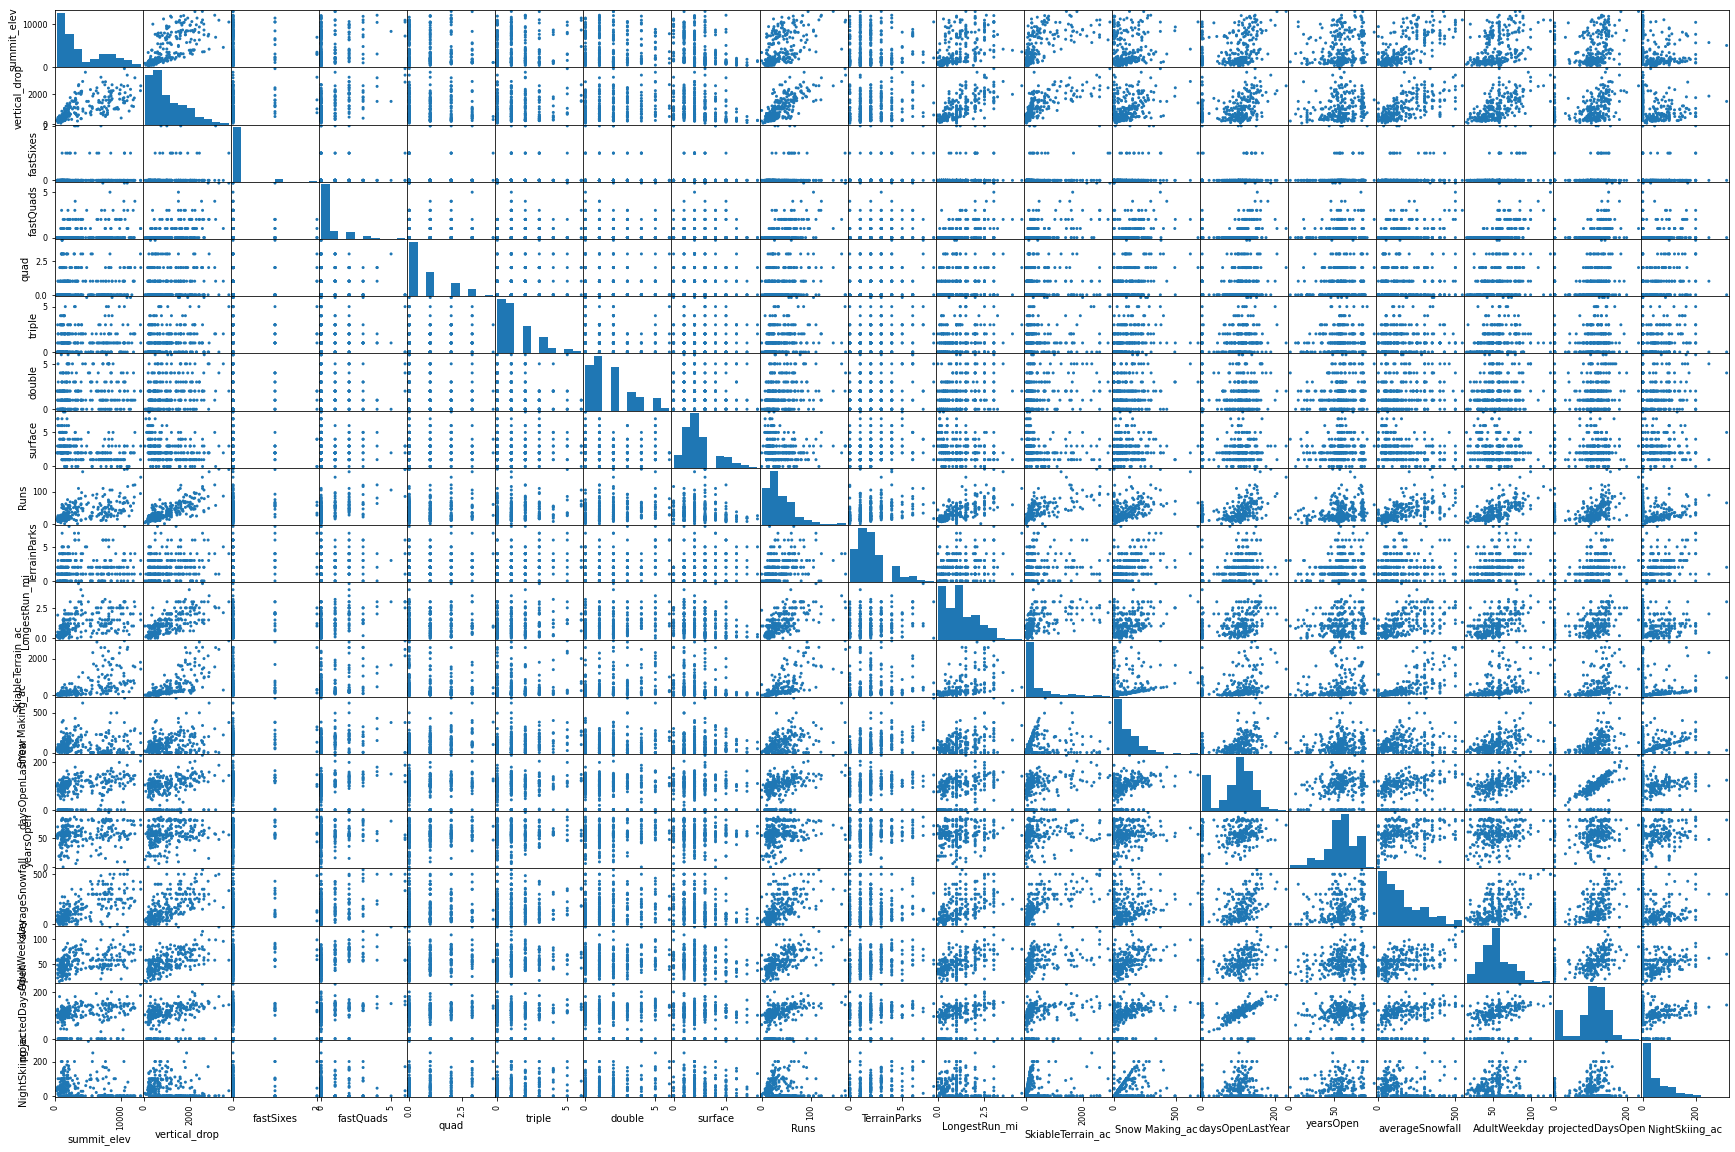

In [25]:
pd.plotting.scatter_matrix(df_after, alpha =1, figsize=(30,20))

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [28]:
from sklearn.cluster import KMeans
x = df_remove.drop('state', axis =1).values

In [29]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

In [30]:
kmeans3 = KMeans(n_clusters=3)
labels = kmeans3.fit_predict(x)
print(labels)

[0 0 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 2 2 2 2 2 2 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 1 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 0 1 2 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 1 1]


In [31]:
kmeans3.cluster_centers_

array([[1.83615000e+03, 7.18505556e+02, 1.10463889e+03, 6.66666667e-02,
        3.27777778e-01, 8.05555556e-01, 1.21666667e+00, 1.60000000e+00,
        2.71666667e+00, 6.77777778e+00, 2.95555556e+01, 2.02777778e+00,
        9.53888889e-01, 1.40483333e+02, 1.05877778e+02, 8.30333333e+01,
        5.51777778e+01, 9.37388889e+01, 5.04421449e+01, 5.87529588e+01,
        9.30833333e+01, 5.21333333e+01],
       [1.06680833e+04, 1.79827778e+03, 8.84777778e+03, 8.33333333e-02,
        1.27777778e+00, 8.33333333e-01, 1.61111111e+00, 1.63888889e+00,
        1.55555556e+00, 7.08333333e+00, 6.89722222e+01, 1.97222222e+00,
        1.76666667e+00, 1.04313889e+03, 1.29444444e+02, 1.21138889e+02,
        5.92500000e+01, 2.96388889e+02, 6.96204348e+01, 7.18657686e+01,
        1.20805556e+02, 1.56111111e+01],
       [7.19130645e+03, 1.49824194e+03, 5.70793548e+03, 9.67741935e-02,
        6.45161290e-01, 5.00000000e-01, 1.35483871e+00, 2.22580645e+00,
        1.74193548e+00, 6.61290323e+00, 4.43709677e+01

In [32]:
plt.scatter(x[:,0],x[:,1],c=labels, cmap='rainbow')

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [33]:
df_remove['cluster'] = pd.Series(labels,index=df_remove.index)

<ipython-input-33-d080a4437746>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remove['cluster'] = pd.Series(labels,index=df_remove.index)


In [34]:
pwd

'/Users/tupran/Documents/Data/GitHub/GuidedCapstone/DataWrangling'

In [35]:
os.chdir('/Users/tupran/Documents/Data/GitHub/GuidedCapstone/data')
df_remove.to_csv('step3_output.csv')

In [36]:
kmeans2 = KMeans(n_clusters=2)
labels2 = kmeans2.fit_predict(x)
print(labels)

[0 0 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 2 2 2 2 2 2 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 1 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 0 1 2 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 1 1]


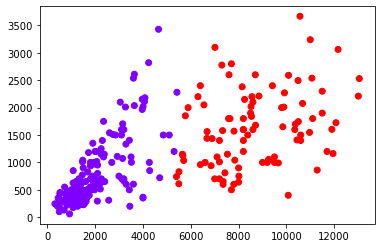

In [37]:
plt.scatter(x[:,0],x[:,1],c=labels2, cmap='rainbow')

In [38]:
kmeans2.cluster_centers_

array([[1.92364865e+03, 7.38005405e+02, 1.17309730e+03, 7.02702703e-02,
        3.40540541e-01, 8.00000000e-01, 1.22162162e+00, 1.62162162e+00,
        2.71351351e+00, 6.81081081e+00, 2.97567568e+01, 2.02162162e+00,
        9.70270270e-01, 1.48751351e+02, 1.05589189e+02, 8.34054054e+01,
        5.51945946e+01, 9.68810811e+01, 5.06189354e+01, 5.91172940e+01,
        9.40594595e+01, 5.43945946e+01],
       [8.65101075e+03, 1.61751613e+03, 7.03466667e+03, 8.60215054e-02,
        8.81720430e-01, 6.23655914e-01, 1.45161290e+00, 1.98924731e+00,
        1.62365591e+00, 6.72043011e+00, 5.42903226e+01, 1.95698925e+00,
        1.61397849e+00, 9.65666667e+02, 9.76559140e+01, 1.04709677e+02,
        6.10215054e+01, 2.83387097e+02, 6.25260262e+01, 6.46039627e+01,
        1.10225806e+02, 3.07956989e+01]])